In [ ]:
Krzysztof Swędzioł MOWNiT Lab 5 418001

Zadanie 1

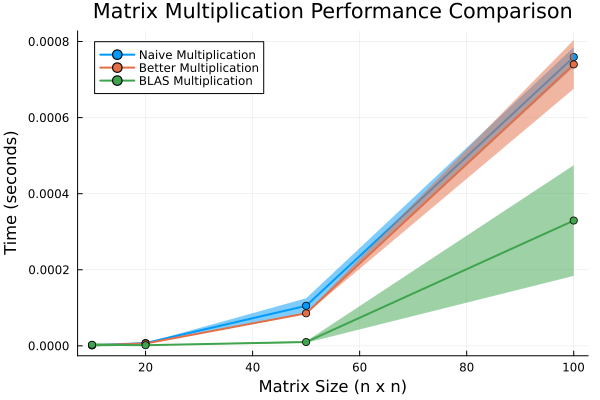

In [5]:
using LinearAlgebra
using Plots
using Statistics  


function naive_multiplication(A, B)
    n = size(A, 1)
    C = zeros(n, n)
    for i in 1:n
        for j in 1:n
            for k in 1:n
                C[i, j] += A[i, k] * B[k, j]
            end
        end
    end
    return C
end


function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end


function measure_times(f, A, B, repetitions)
    times = Float64[]
    for _ in 1:repetitions
        push!(times, @elapsed f(A, B))
    end
    return mean(times), std(times)
end


sizes = [10, 20, 50, 100]
naive_times = []
naive_errors = []
better_times = []
better_errors = []
blas_times = []
blas_errors = []

repetitions = 6  

for n in sizes
    A = rand(n, n)
    B = rand(n, n)

   
    naive_mean, naive_std = measure_times(naive_multiplication, A, B, repetitions)
    push!(naive_times, naive_mean)
    push!(naive_errors, naive_std)


    better_mean, better_std = measure_times(better_multiplication, A, B, repetitions)
    push!(better_times, better_mean)
    push!(better_errors, better_std)

    
    blas_mean, blas_std = measure_times((x, y) -> x * y, A, B, repetitions)
    push!(blas_times, blas_mean)
    push!(blas_errors, blas_std)
end


plot(sizes, naive_times, ribbon=naive_errors, label="Naive Multiplication", lw=2, marker=:circle)
plot!(sizes, better_times, ribbon=better_errors, label="Better Multiplication", lw=2, marker=:circle)
plot!(sizes, blas_times, ribbon=blas_errors, label="BLAS Multiplication", lw=2, marker=:circle)
title!("Matrix Multiplication Performance Comparison")
xlabel!("Matrix Size (n x n)")
ylabel!("Time (seconds)")


Zadanie 2

In [ ]:
Zadanie 3

W mnożeniu macierzy występują trzy zagnieżdżone pętle, tak więc do aproksmowania funkcji używam wielomianu stopnia 3 dla własnych implementacji oraz stopnia 2 dla BLAS, ponieważ udało mi się znaleźć informację, że wykonuje O(n^3) operacji na O(n^2) danych

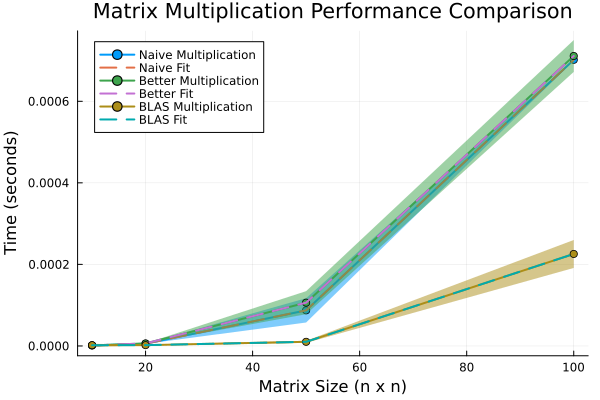

In [7]:
using LinearAlgebra
using Plots
using Statistics
using Polynomials

function naive_multiplication(A, B)
    n = size(A, 1)
    C = zeros(Float64, n, n)
    for i in 1:n
        for j in 1:n
            for k in 1:n
                C[i, j] += A[i, k] * B[k, j]
            end
        end
    end
    return C
end

function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] += A[i,k] * B[k,j]
            end
        end
    end
    C
end

function measure_times(f, A, B, repetitions)
    times = Float64[]
    for _ in 1:repetitions
        push!(times, @elapsed f(A, B))
    end
    return mean(times), std(times)
end

sizes = [10, 20, 50, 100]
naive_times = Float64[]
naive_errors = Float64[]
better_times = Float64[]
better_errors = Float64[]
blas_times = Float64[]
blas_errors = Float64[]

repetitions = 6  

for n in sizes
    A = rand(n, n)
    B = rand(n, n)

    naive_mean, naive_std = measure_times(naive_multiplication, A, B, repetitions)
    push!(naive_times, naive_mean)
    push!(naive_errors, naive_std)

    better_mean, better_std = measure_times(better_multiplication, A, B, repetitions)
    push!(better_times, better_mean)
    push!(better_errors, better_std)

    blas_mean, blas_std = measure_times((x, y) -> x * y, A, B, repetitions)
    push!(blas_times, blas_mean)
    push!(blas_errors, blas_std)
end


naive_poly = fit(Polynomial, sizes, naive_times, 3)
better_poly = fit(Polynomial, sizes, better_times, 3)
blas_poly = fit(Polynomial, sizes, blas_times, 3)


plot(sizes, naive_times, ribbon=naive_errors, label="Naive Multiplication", lw=2, marker=:circle)
plot!(sizes, [naive_poly(x) for x in sizes], label="Naive Fit", lw=2, linestyle=:dash)
plot!(sizes, better_times, ribbon=better_errors, label="Better Multiplication", lw=2, marker=:circle)
plot!(sizes, [better_poly(x) for x in sizes], label="Better Fit", lw=2, linestyle=:dash)
plot!(sizes, blas_times, ribbon=blas_errors, label="BLAS Multiplication", lw=2, marker=:circle)
plot!(sizes, [blas_poly(x) for x in sizes], label="BLAS Fit", lw=2, linestyle=:dash)

title!("Matrix Multiplication Performance Comparison")
xlabel!("Matrix Size (n x n)")
ylabel!("Time (seconds)")


Zadanie 4

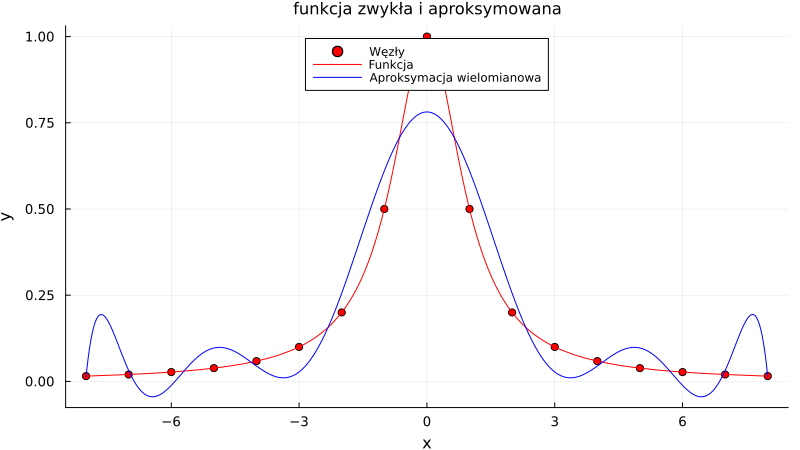

In [10]:
function to_approx(x)
    1/(1+x^2)
end
xs = -8:1:8
ys = [to_approx(x) for x in xs]
poly_approx = fit(xs,ys,10)
xsf = -8:0.01:8
ysf = [poly_approx(x) for x in xsf]
scatter(
    xs,
    ys,
    xtickfontsize=9, 
    ytickfontsize=9, 
    titlefontsize = 11,
    label="Węzły",
    legend_position=:top,
    size=(800,450),
    color = :red,
    title = "funkcja zwykła i aproksymowana",
    xlabel = "x",
    ylabel = "y"
)
plot!(
    to_approx,
    extrema(xs)...,
    label="Funkcja",
    color = :red
)
plot!(
    xsf,
    ysf,
    label="Aproksymacja wielomianowa",
    color = :blue
)

Jak widzimy, efekt Rungego jest znacząco zniwelowany względem tego, co otrzymalibyćmy przy interpolacji, zwłaszcza na krańcach przedziału.

Zadanie 5

In [2]:
using Pkg
Pkg.add("Plots")
Pkg.add("TaylorSeries")
Pkg.add("Polynomials")

   Resolving package versions...
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Manifest.toml`


In [3]:
using Pkg
Pkg.add("ApproxFun")

   Resolving package versions...
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Manifest.toml`


In [4]:
using Plots
using Polynomials


f(x) = log(1 + x)


x0 = 0


x = -0.99:0.01:1.5

# Stopnie aproksymacji Taylora i Padé
N_taylor = 5
N_pade_m = 3
N_pade_n = 2

# Współczynniki rozwinięcia Taylora
taylor_coefs = [1, -1/2, 1/3, -1/4, 1/5, -1/6]

taylor_poly = Poly(taylor_coefs)
taylor_approx = [polyval(taylor_poly, xi - x0) for xi in x]


pade_approx = Polynomials.PadeApproximation.pade(taylor_coefs, N_pade_m, N_pade_n)
pade_vals = [pade_approx(xi - x0) for xi in x]


plot(x, f.(x), label="log(1+x)", title="Porównanie aproksymacji funkcji log(1+x)")
plot!(x, taylor_approx, label="Aproksymacja Taylora (stopień 5)")
plot!(x, pade_vals, label="Aproksymacja Padé [3/2]")
vline!([-1], label="Osobliwość", color=:black, linestyle=:dash)


xlabel!("x")
ylabel!("f(x)")
legend(:bottomright)
grid(true)


plot!()


UndefVarError: UndefVarError: `Poly` not defined